In [1]:
! pip install --upgrade ultralytics -qq 

### 4k Images Test

#### Quick 4k Image Compatibility Test

In [1]:
from ultralytics import YOLO
import os
import random
import shutil

In [2]:
# Define paths
original_train_images = "split/images/train"
original_train_labels = "split/labels/train"
original_val_images = "split/images/val"
original_val_labels = "split/labels/val"

sampled_train_images = "split_samples/images/train"
sampled_train_labels = "split_samples/labels/train"
sampled_val_images = "split_samples/images/val"
sampled_val_labels = "split_samples/labels/val"

# Ensure new directories exist
for path in [sampled_train_images, sampled_train_labels, sampled_val_images, sampled_val_labels]:
    os.makedirs(path, exist_ok=True)

In [5]:
# Function to sample and copy images with their labels
def sample_and_copy(src_img_dir, src_lbl_dir, dst_img_dir, dst_lbl_dir, num_samples):
    img_files = [f for f in os.listdir(src_img_dir) if f.endswith((".jpg", ".png",".jpeg"))]
    
    sampled_files = random.sample(img_files, min(num_samples, len(img_files)))

    for img_file in sampled_files:
        img_path = os.path.join(src_img_dir, img_file)
        lbl_path = os.path.join(src_lbl_dir, img_file.replace(".jpg", ".txt").replace(".png", ".txt").replace(".jpeg", ".txt"))
        
        if os.path.exists(lbl_path):  # Ensure the label file exists
            shutil.copy(img_path, dst_img_dir)
            shutil.copy(lbl_path, dst_lbl_dir)

In [6]:
# Number of samples to take
num_train_samples = 50  # Adjust as needed
num_val_samples = 20    # Adjust as needed

# Sample from train and val sets
sample_and_copy(original_train_images, original_train_labels, sampled_train_images, sampled_train_labels, num_train_samples)
sample_and_copy(original_val_images, original_val_labels, sampled_val_images, sampled_val_labels, num_val_samples)

print("✅ Sampling complete! Check 'split_samples' directory.")

✅ Sampling complete! Check 'split_samples' directory.


In [8]:
# Load YOLOv9 model (replace with v8 if needed)
model = YOLO("yolov8s.pt")

# Test image loading by running inference on one image per resolution
results_4k = model("split_samples/images/train/pexels-photo-1267256.jpeg", imgsz=2048)  # Adjust if needed


image 1/1 /Users/stevenprawira/Desktop/capstone/foruse/sets/set1/set1_4k/split_samples/images/train/pexels-photo-1267256.jpeg: 1152x2048 7 persons, 2 tvs, 2 books, 1606.5ms
Speed: 33.9ms preprocess, 1606.5ms inference, 4.3ms postprocess per image at shape (1, 3, 1152, 2048)


In [9]:
# Get list of all images in the directory
image_dir = "split_samples/images/train/"
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Select 10 random images
random_images = random.sample(image_files, 10)

# Run inference on each image
results = [model(image, imgsz=2048) for image in random_images]


image 1/1 /Users/stevenprawira/Desktop/capstone/foruse/sets/set1/set1_4k/split_samples/images/train/pexels-photo-5452194.jpeg: 1152x2048 3 persons, 1 tie, 1 chair, 3 couchs, 1 cell phone, 2 books, 1 vase, 1565.5ms
Speed: 24.3ms preprocess, 1565.5ms inference, 6.2ms postprocess per image at shape (1, 3, 1152, 2048)

image 1/1 /Users/stevenprawira/Desktop/capstone/foruse/sets/set1/set1_4k/split_samples/images/train/pexels-photo-12903181.jpeg: 1152x2048 2 persons, 1 tie, 1409.6ms
Speed: 22.3ms preprocess, 1409.6ms inference, 4.5ms postprocess per image at shape (1, 3, 1152, 2048)

image 1/1 /Users/stevenprawira/Desktop/capstone/foruse/sets/set1/set1_4k/split_samples/images/train/pexels-photo-7441083.jpeg: 1152x2048 5 persons, 6 cups, 1 chair, 1 dining table, 1 tv, 1 laptop, 1 remote, 1490.5ms
Speed: 13.3ms preprocess, 1490.5ms inference, 7.5ms postprocess per image at shape (1, 3, 1152, 2048)

image 1/1 /Users/stevenprawira/Desktop/capstone/foruse/sets/set1/set1_4k/split_samples/images/t

#### Batch Check (Verify Dataset Readibility)

In [10]:
# Run dataset verification before training
model.train(data="/Users/stevenprawira/Desktop/capstone/foruse/sets/set1/set1_4k/split_samples/dataset.yaml", epochs=1, imgsz=2048, batch = 2)

Ultralytics 8.3.75 🚀 Python-3.12.4 torch-2.6.0 CPU (Apple M2)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/Users/stevenprawira/Desktop/capstone/foruse/sets/set1/set1_4k/split_samples/dataset.yaml, epochs=1, time=None, patience=100, batch=2, imgsz=2048, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

train: Scanning /Users/stevenprawira/Desktop/capstone/foruse/sets/set1/set1_4k/split_samples/labels/train... 53 images, 0 backgrounds, 0 corrupt: 100%|██████████| 53/53 [00:00<00:00, 547.40it/s]

train: New cache created: /Users/stevenprawira/Desktop/capstone/foruse/sets/set1/set1_4k/split_samples/labels/train.cache



val: Scanning /Users/stevenprawira/Desktop/capstone/foruse/sets/set1/set1_4k/split_samples/labels/val... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<00:00, 809.68it/s]

val: New cache created: /Users/stevenprawira/Desktop/capstone/foruse/sets/set1/set1_4k/split_samples/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000476, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 2048 train, 2048 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      3.225      6.639      2.973         42       2048:  44%|████▍     | 12/27 [03:50<04:25, 17.70s/it]libpng warning: iCCP: known incorrect sRGB profile
        1/1         0G      3.192       6.54      2.946         69       2048:  48%|████▊     | 13/27 [04:08<04:10, 17.90s/it]libpng warning: iCCP: known incorrect sRGB profile
        1/1         0G      3.155      6.765      2.921         16       2048:  89%|████████▉ | 24/27 [07:36<01:03, 21.28s/it]libpng warning: iCCP: known incorrect sRGB profile
        1/1         0G      3.108      6.599      2.876         26       2048: 100%|██████████| 27/27 [08:16<00:00, 18.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  67%|██████▋   | 4/6 [00:17<00:08,  4.47s/it]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████

                   all         22        226    0.00192     0.0583    0.00183   0.000664

1 epochs completed in 0.156 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.12.4 torch-2.6.0 CPU (Apple M2)
Model summary (fused): 168 layers, 11,132,163 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  67%|██████▋   | 4/6 [00:18<00:09,  4.60s/it]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:25<00:00,  4.30s/it]


                   all         22        226    0.00193     0.0583    0.00183   0.000677
                person         21         41          0          0          0          0
                   ear         16         22          0          0          0          0
                  face         16         29   0.000821     0.0345   0.000528   0.000106
     face-mask-medical          2          2          0          0          0          0
                  tool          8         11   0.000725     0.0909   0.000792   0.000249
               glasses          8         16          0          0          0          0
                gloves          3          4          0          0          0          0
                helmet          3          3    0.00175      0.333    0.00383    0.00153
                  hand         17         41    0.00656     0.0488    0.00379    0.00186
                  head         19         44     0.0152       0.25     0.0149    0.00505
          medical-sui

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  3,  5,  7,  8,  9, 10, 11, 12, 13, 14, 16])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x1690251f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045, 

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline


image 1/1 /Users/stevenprawira/Desktop/capstone/foruse/sets/set1/set1_4k/split_samples/images/val/pexels-photo-585419.jpeg: 1152x2048 1 head, 887.1ms
Speed: 11.6ms preprocess, 887.1ms inference, 2.6ms postprocess per image at shape (1, 3, 1152, 2048)


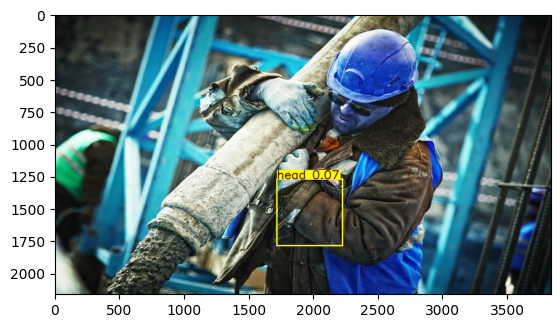

In [17]:
# Load the trained model (it should be saved in the "runs/train/exp/weights" directory)
model = YOLO("runs/detect/train/weights/best.pt")  

# Run inference on a test image
results = model("split_samples/images/val/pexels-photo-585419.jpeg", imgsz=2048, conf=0.05) #yolo model adjusted to conf 0.15, typically yolo model is 0.25.

# Convert result to an image with bounding boxes
image_with_boxes = results[0].plot()  # Returns a numpy array with the plotted results

# Show the image inline
plt.imshow(image_with_boxes)
plt.show()



image 1/1 /Users/stevenprawira/Desktop/capstone/foruse/sets/set1/set1_4k/split_samples/images/train/pexels-photo-6346818.jpeg: 1152x2048 1 foot, 1 tool, 1 glasses, 7 heads, 831.6ms
Speed: 38.1ms preprocess, 831.6ms inference, 1.0ms postprocess per image at shape (1, 3, 1152, 2048)


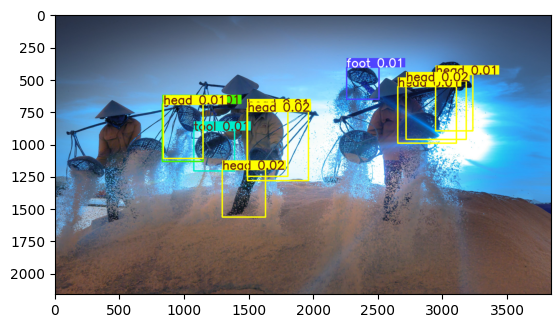


image 1/1 /Users/stevenprawira/Desktop/capstone/foruse/sets/set1/set1_4k/split_samples/images/train/pexels-photo-5642041.jpeg: 1152x2048 (no detections), 855.3ms
Speed: 12.9ms preprocess, 855.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1152, 2048)


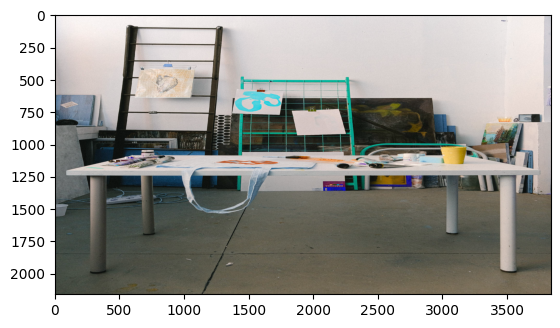


image 1/1 /Users/stevenprawira/Desktop/capstone/foruse/sets/set1/set1_4k/split_samples/images/train/building-construction-building-site-constructing.jpg: 1152x2048 (no detections), 846.5ms
Speed: 11.9ms preprocess, 846.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1152, 2048)


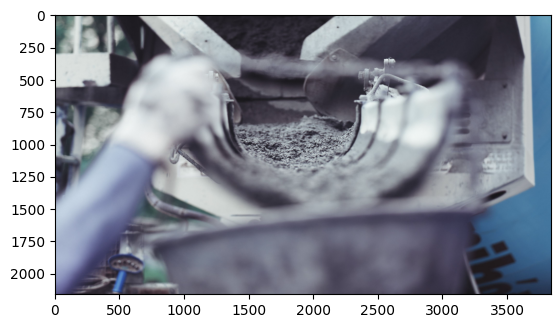


image 1/1 /Users/stevenprawira/Desktop/capstone/foruse/sets/set1/set1_4k/split_samples/images/train/pexels-photo-4509092.jpeg: 1152x2048 (no detections), 823.8ms
Speed: 15.1ms preprocess, 823.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1152, 2048)


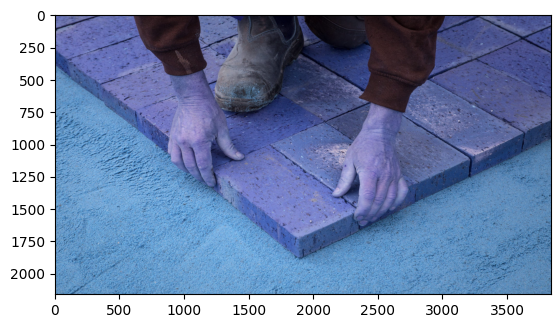


image 1/1 /Users/stevenprawira/Desktop/capstone/foruse/sets/set1/set1_4k/split_samples/images/train/pexels-photo-3873834.jpeg: 1152x2048 1 foot, 1 tool, 835.6ms
Speed: 12.5ms preprocess, 835.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1152, 2048)


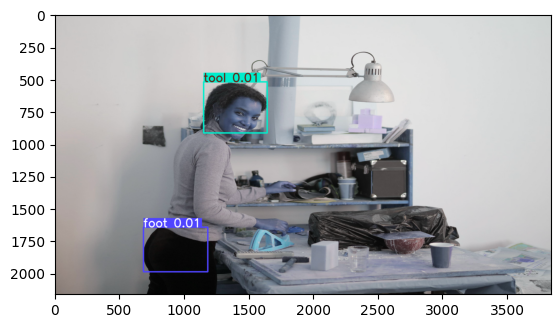


image 1/1 /Users/stevenprawira/Desktop/capstone/foruse/sets/set1/set1_4k/split_samples/images/train/pexels-photo-7658241.jpeg: 1152x2048 3 foots, 9 heads, 846.0ms
Speed: 11.1ms preprocess, 846.0ms inference, 1.4ms postprocess per image at shape (1, 3, 1152, 2048)


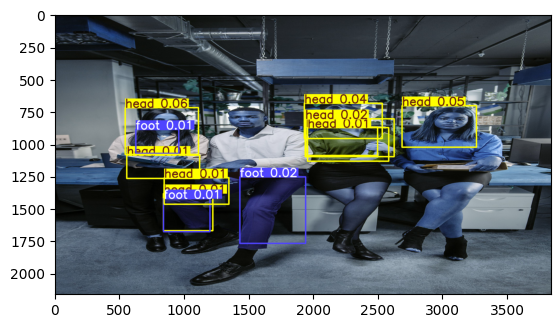


image 1/1 /Users/stevenprawira/Desktop/capstone/foruse/sets/set1/set1_4k/split_samples/images/train/pexels-photo-7480451.jpeg: 1152x2048 3 heads, 796.2ms
Speed: 33.2ms preprocess, 796.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1152, 2048)


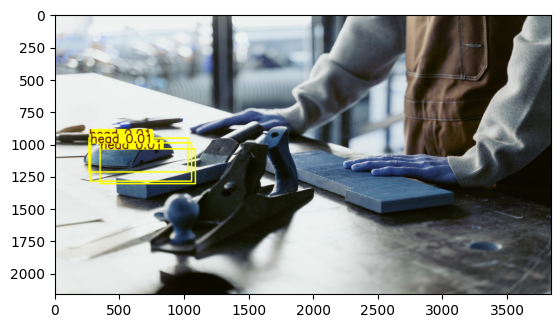


image 1/1 /Users/stevenprawira/Desktop/capstone/foruse/sets/set1/set1_4k/split_samples/images/train/pexels-photo-5953698.jpeg: 1152x2048 (no detections), 788.8ms
Speed: 11.6ms preprocess, 788.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1152, 2048)


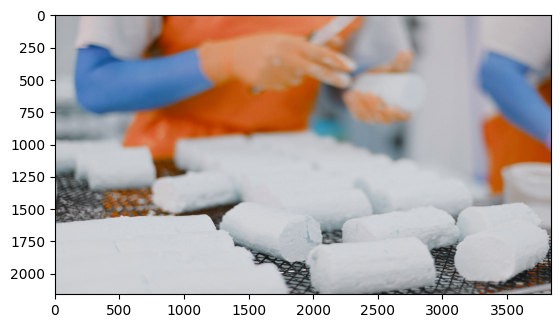


image 1/1 /Users/stevenprawira/Desktop/capstone/foruse/sets/set1/set1_4k/split_samples/images/train/pexels-photo-6696863.jpeg: 1152x2048 14 tools, 9 heads, 776.3ms
Speed: 12.0ms preprocess, 776.3ms inference, 1.1ms postprocess per image at shape (1, 3, 1152, 2048)


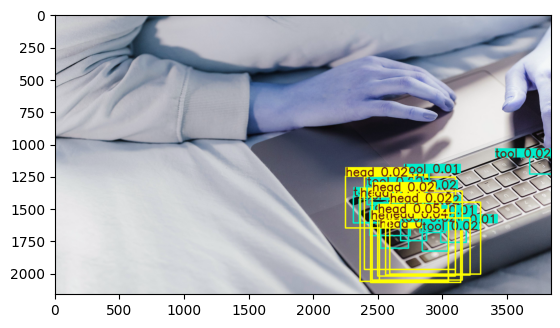

libpng warning: iCCP: known incorrect sRGB profile


image 1/1 /Users/stevenprawira/Desktop/capstone/foruse/sets/set1/set1_4k/split_samples/images/train/pexels-photo-13342812.png: 1152x2048 2 heads, 784.0ms
Speed: 10.7ms preprocess, 784.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1152, 2048)


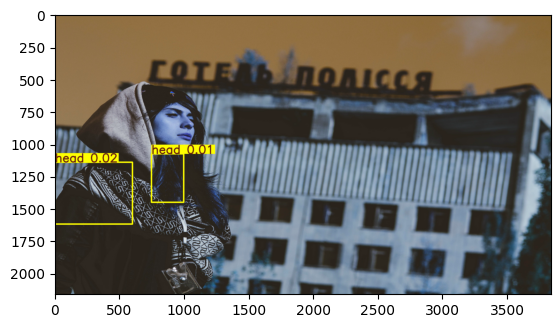

In [20]:
# Get list of all images in the directory
image_dir = "split_samples/images/train/"
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Select 10 random images
random_images = random.sample(image_files, 10)

# Run inference on each image and plot the results

for image in random_images: 
    results = model(image, imgsz=2048, conf=0.01)  # Adjust if needed
    image_with_boxes = results[0].plot()  # Returns a numpy array with the plotted results
    plt.imshow(image_with_boxes)
    plt.show()
